# Import required libraries

In [1]:
import pickle
import pydotplus
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  

import warnings
warnings.filterwarnings('ignore')

c:\users\aashish agarwal\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Reading the files

In [2]:
assessments = pd.read_csv('anonymisedData/assessments.csv')
courses = pd.read_csv('anonymisedData/courses.csv')
studentAssessment = pd.read_csv('anonymisedData/studentAssessment.csv')
studentInfo = pd.read_csv('anonymisedData/studentInfo.csv')
studentRegistration = pd.read_csv('anonymisedData/studentRegistration.csv')
studentVle = pd.read_csv('anonymisedData/studentVle.csv', nrows=999999)
vle = pd.read_csv('anonymisedData/vle.csv')

# Identifying the columns 

In [3]:
set1 = list(assessments.columns.values)
set2 = list(courses.columns.values)
set3 = list(studentAssessment.columns.values)
set4 = list(studentInfo.columns.values)
set5 = list(studentRegistration.columns.values)
set6 = list(studentVle.columns.values)
set7 = list(vle.columns.values)

In [4]:
all_columns = [set1, set2, set3, set4, set5, set6, set7]
columns_count = [assessments.shape,courses.shape,studentAssessment.shape, studentInfo.shape, studentRegistration.shape, studentVle.shape, vle.shape]
columns_header = ['assessments', 'courses', 'studentAssessment', 'studentInfo', 'studentRegistration', 'studentVle', 'vle' ] 

In [5]:
d = {'Table Name':columns_header,'Rows, Columns': columns_count,'Column Names':all_columns}
df = pd.set_option('max_colwidth', 200)
df = pd.DataFrame(d)
df

Table Name Rows, Columns  \
0          assessments      (206, 6)   
1              courses       (22, 3)   
2    studentAssessment   (173912, 5)   
3          studentInfo   (32593, 12)   
4  studentRegistration    (32593, 5)   
5           studentVle   (999999, 6)   
6                  vle     (6364, 6)   

                                                                                                                                                           Column Names  
0                                                                                        [code_module, code_presentation, id_assessment, assessment_type, date, weight]  
1                                                                                                          [code_module, code_presentation, module_presentation_length]  
2                                                                                                         [id_assessment, id_student, date_submitted, is_banked, score]  
3  [code_module, code_presentation, id_student, gender, region, highest_education, imd_band, age_band, num_of_prev_attempts, studied_credits, disability, final_result]  
4                                                                                  [code_module, code_presentation, id_student, date_registration, date_unregistration]  
5                                                                                                [code_module, code_presentation, id_student, id_site, date, sum_click]  
6                                                                                          [id_site, code_module, code_presentation, activity_type, week_from, week_to]

# Cleaning the data

In [6]:
# Dropping all the missing values
assessments.dropna(inplace=True)
courses.dropna(inplace=True)
studentAssessment.dropna(inplace=True)
studentInfo.dropna(inplace=True)
studentRegistration.dropna(inplace=True)
studentVle.dropna(inplace=True)
vle.dropna(inplace=True)

In [7]:
columns_count = [assessments.shape,courses.shape,studentAssessment.shape, studentInfo.shape, studentRegistration.shape, studentVle.shape, vle.shape]
d = {'Table Name':columns_header,'Rows, Columns': columns_count,'Column Names':all_columns}
df = pd.set_option('max_colwidth', 200)
df = pd.DataFrame(d)
df

Table Name Rows, Columns  \
0          assessments      (195, 6)   
1              courses       (22, 3)   
2    studentAssessment   (173739, 5)   
3          studentInfo   (31482, 12)   
4  studentRegistration    (10033, 5)   
5           studentVle   (999999, 6)   
6                  vle     (1121, 6)   

                                                                                                                                                           Column Names  
0                                                                                        [code_module, code_presentation, id_assessment, assessment_type, date, weight]  
1                                                                                                          [code_module, code_presentation, module_presentation_length]  
2                                                                                                         [id_assessment, id_student, date_submitted, is_banked, score]  
3  [code_module, code_presentation, id_student, gender, region, highest_education, imd_band, age_band, num_of_prev_attempts, studied_credits, disability, final_result]  
4                                                                                  [code_module, code_presentation, id_student, date_registration, date_unregistration]  
5                                                                                                [code_module, code_presentation, id_student, id_site, date, sum_click]  
6                                                                                          [id_site, code_module, code_presentation, activity_type, week_from, week_to]

# Data Analysis - Based on Final Result

Analysis to understand the distribution of the Quasi-identifying attributes.[1] The 6 main attributes identified are gender, disability, age, highest education, region, imd band. These can be used to understand the final result.
 
[1] https://www.nature.com/articles/sdata2017171

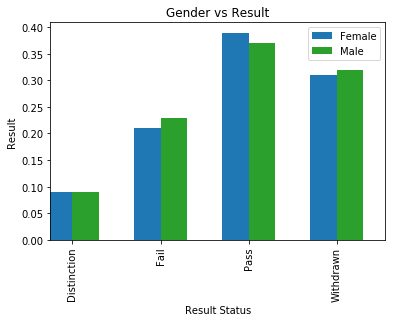

In [8]:
# Results based on Gender

gender = studentInfo.groupby(['gender'],as_index = False)
gender_count = gender['id_student'].count()
result_gender = studentInfo.groupby(['gender', 'final_result'],as_index = False)
result_gender_count = result_gender['id_student'].count()

merge = pd.merge(gender_count, result_gender_count, on = 'gender', how = 'left')
merge['i'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['gender','final_result', 'i']]

female = merge.loc[merge['gender'] == 'F']
male = merge.loc[merge['gender'] == 'M']

fig = plt.figure() 

ax = fig.add_subplot(111) 

female.set_index('final_result',drop=True,inplace=True)
male.set_index('final_result',drop=True,inplace=True)
female.plot(kind='bar', ax=ax, width= 0.3, position=1)
male.plot(kind='bar', color='#2ca02c', ax=ax, width= 0.3, position=0)

plt.xlabel('Result Status')
plt.ylabel('Result')
plt.title('Gender vs Result')
plt.legend(['Female', 'Male'])
plt.show()

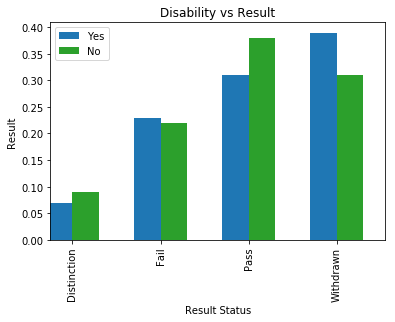

In [9]:
#Results based on Diasability

disability_ = studentInfo.groupby(['disability'],as_index = False)
disability_count = disability_['id_student'].count()
result_disability = studentInfo.groupby(['disability', 'final_result'],as_index = False)
result_disability_count = result_disability['id_student'].count()

merge = pd.merge(disability_count, result_disability_count, on = 'disability', how = 'left')
merge['i'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['disability','final_result', 'i']]

yes = merge.loc[merge['disability'] == 'Y']
no = merge.loc[merge['disability'] == 'N']

fig = plt.figure() 

ax = fig.add_subplot(111) 

yes.set_index('final_result',drop=True,inplace=True)
no.set_index('final_result',drop=True,inplace=True)
yes.plot(kind='bar', ax=ax, width= 0.3, position=1)
no.plot(kind='bar', color='#2ca02c', ax=ax, width= 0.3, position=0)

plt.xlabel('Result Status')
plt.ylabel('Result')
plt.title('Disability vs Result')
plt.legend(['Yes', 'No'])
plt.show()

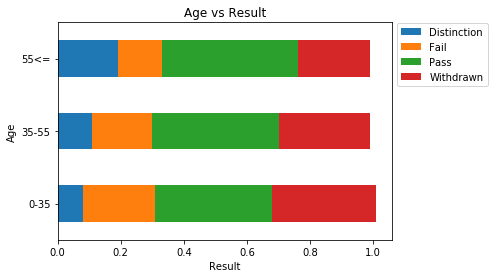

In [10]:
#Results based on Age

age = studentInfo.groupby(['age_band'],as_index = False)
age_count = age['id_student'].count()
result_age = studentInfo.groupby(['age_band', 'final_result'],as_index = False)
result_age_count = result_age['id_student'].count()

merge = pd.merge(age_count, result_age_count, on = 'age_band', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['age_band','final_result', '_']]

merge.set_index(['age_band','final_result']).unstack().plot(kind = 'barh', stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Age')
plt.xlabel('Result')
plt.title('Age vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

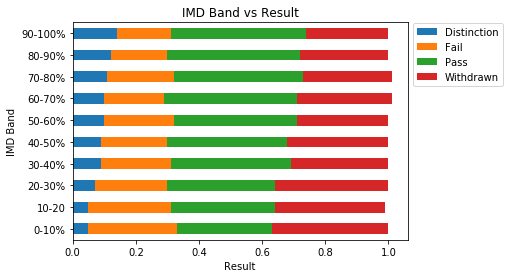

In [11]:
#Results based on IMD Band

import pandas as pd

imd = studentInfo.groupby(['imd_band'],as_index = False)
imd_count = imd['id_student'].count()
result_imd = studentInfo.groupby(['imd_band', 'final_result'],as_index = False)
result_imd_count = result_imd['id_student'].count()

merge = pd.merge(imd_count, result_imd_count , on = 'imd_band', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['imd_band','final_result', '_']]

merge.set_index(['imd_band','final_result']).unstack().plot(kind="barh", stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('IMD Band')
plt.xlabel('Result')
plt.title('IMD Band vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

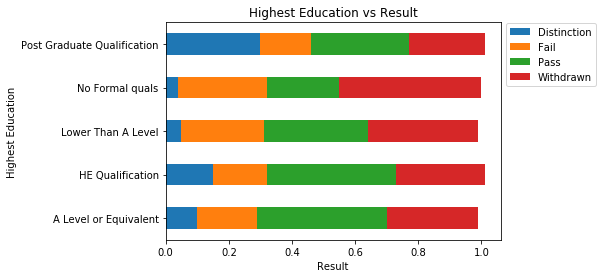

In [12]:
#Results based on Highest Education

education = studentInfo.groupby(['highest_education'],as_index = False)
education_count = education['id_student'].count()
result_education = studentInfo.groupby(['highest_education', 'final_result'],as_index = False)
result_education_count = result_education['id_student'].count()

merge = pd.merge(education_count, result_education_count , on = 'highest_education', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['highest_education','final_result', '_']]

merge.set_index(['highest_education','final_result']).unstack().plot(kind = 'barh', stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Highest Education')
plt.xlabel('Result')
plt.title('Highest Education vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

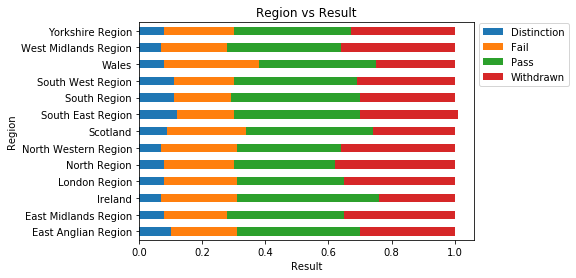

In [13]:
#Results based on Region

import pandas as pd

region = studentInfo.groupby(['region'],as_index = False)
region_count = region['id_student'].count()
result_region = studentInfo.groupby(['region', 'final_result'],as_index = False)
result_region_count = result_region['id_student'].count()

merge = pd.merge(region_count, result_region_count , on = 'region', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['region','final_result', '_']]

merge.set_index(['region','final_result']).unstack().plot(kind="barh", stacked=True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Region')
plt.xlabel('Result')
plt.title('Region vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

# Predictive Models

In [14]:
dfs = [studentAssessment, studentInfo, studentRegistration]
df_final = reduce(lambda left,right: pd.merge(left,right,on='id_student'), dfs)
df_final['final_result'].value_counts()

Withdrawn      32158
Pass            8643
Fail            4406
Distinction     1203
Name: final_result, dtype: int64

In [15]:
df_final = df_final.drop(['date_registration','date_unregistration', 'id_assessment', 'id_student', 'date_submitted', 'score', 'studied_credits'],axis =1) # too many NaN values

In [16]:
df_final.dropna(inplace=True)
df_final['final_result'].value_counts()

Withdrawn      32158
Pass            8643
Fail            4406
Distinction     1203
Name: final_result, dtype: int64

In [17]:
df_final.head()

is_banked code_module_x code_presentation_x gender               region  \
0          0           AAA               2013J      F  East Anglian Region   
1          0           AAA               2014J      F  East Anglian Region   
2          0           AAA               2013J      F  East Anglian Region   
3          0           AAA               2014J      F  East Anglian Region   
4          1           AAA               2013J      F  East Anglian Region   

       highest_education imd_band age_band  num_of_prev_attempts disability  \
0  A Level or Equivalent   70-80%     0-35                     0          N   
1  A Level or Equivalent   70-80%     0-35                     1          N   
2  A Level or Equivalent   70-80%     0-35                     0          N   
3  A Level or Equivalent   70-80%     0-35                     1          N   
4  A Level or Equivalent   70-80%     0-35                     0          N   

  final_result code_module_y code_presentation_y  
0    Withdrawn           AAA               2013J  
1         Fail           AAA               2013J  
2    Withdrawn           AAA               2013J  
3         Fail           AAA               2013J  
4    Withdrawn           AAA               2013J

In [18]:
df_final_original = df_final

# Converting the final table to catgorical data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_final = df_final.apply(le.fit_transform)

In [19]:
df_final.head()

is_banked  code_module_x  code_presentation_x  gender  region  \
0          0              0                    1       0       0   
1          0              0                    3       0       0   
2          0              0                    1       0       0   
3          0              0                    3       0       0   
4          1              0                    1       0       0   

   highest_education  imd_band  age_band  num_of_prev_attempts  disability  \
0                  0         7         0                     0           0   
1                  0         7         0                     1           0   
2                  0         7         0                     0           0   
3                  0         7         0                     1           0   
4                  0         7         0                     0           0   

   final_result  code_module_y  code_presentation_y  
0             3              0                    1  
1             1              0                    1  
2             3              0                    1  
3             1              0                    1  
4             3              0                    1

**Chi Square Test**

In [20]:
#creating a list of features
features = df_final.columns.tolist()
features.remove('final_result')
target = 'final_result'

In [21]:
#computing chi-square test for independence
from scipy import stats
df2 = pd.DataFrame(columns=["Feature", "P Value (Score)", "Correlation"] )

for col in features:
    print(col)
    contingency_table = pd.crosstab(df_final[target], df_final[col], margins = True)
    f_obs = np.array([contingency_table.iloc[0][:-1].values, contingency_table.iloc[1][0:-1].values])
    p_value = stats.chi2_contingency(f_obs)[1]
    
    if p_value <= 0.05:
        correlation = 'Yes'
    else:
        correlation = 'No'
      
    data = {'Feature':col, 'P Value (Score)':p_value, 'Correlation':correlation} 
    df2 = df2.append(data, ignore_index=True)
    
#chi-square test results
'''
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))
'''
def row_style(row):
    if (row.Correlation == 'Yes' and row.Feature != 'final_result'):
        return ['background-color: yellow']*3
    else:
        return ['background-color: white']*3

df2.style.apply(row_style, axis=1)

is_banked
code_module_x
code_presentation_x
gender
region
highest_education
imd_band
age_band
num_of_prev_attempts
disability
code_module_y
code_presentation_y


In [22]:
# dropping disability
df_final = df_final.drop(['disability'],axis =1)
df_final_original = df_final_original.drop(['disability'],axis =1)

In [23]:
df_final.to_csv("anonymisedData/final_pre_processed_data_encoded.csv", index=False)
df_final_original.to_csv("anonymisedData/final_pre_processed_data.csv", index=False)

In [24]:
#for col in list(df_final_original):
#    print(col)
#    print(df_final_original[col].unique())

In [25]:
#for col in list(df_final):
#    print(col)
#    print(df_final[col].unique())

**Decision Tree**

In [44]:
# Decision Tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(xTrain, yTrain)
train_pred = dt.predict(xTrain)
test_pred = dt.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

Accuracy:0.987 



**Gradient Boosting Regression**

In [27]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=0, loss='huber')
gb = gb.fit(xTrain, yTrain)
print("Accuracy:{0:.3f}".format(gb.score(xTest, yTest)))

Accuracy:0.894


**Random Forest**

In [28]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

rf = RandomForestClassifier(n_estimators=10,random_state=33)
rf = rf.fit(xTrain, yTrain)
train_pred = rf.predict(xTrain)
test_pred = rf.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

Accuracy:0.986 



**Saving The Model**

In [182]:
filename = 'models/decision_tree_model.sav'
pickle.dump(dt, open(filename, 'wb'))

filename = 'models/gradient_boosting_model.sav'
pickle.dump(gb, open(filename, 'wb'))

filename = 'models/random_forest_model.sav'
pickle.dump(rf, open(filename, 'wb'))

# Model Evaluation

In [32]:
# Function to plot accuracy
from sklearn.model_selection import learning_curve
import numpy as np

def plot_accuracy(model):

    train_sizes, train_scores, test_scores = learning_curve(model, xTrain, yTrain, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.gca().invert_yaxis()
    plt.grid()
    plt.ylim(0.0, 1.1)
    plt.title("Accuracy Plot")
    plt.xlabel("Testing")
    plt.ylabel("Accuracy %")

    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
        
    plt.plot(train_sizes, test_mean, 'bo-', color = "r", label="Test Score")


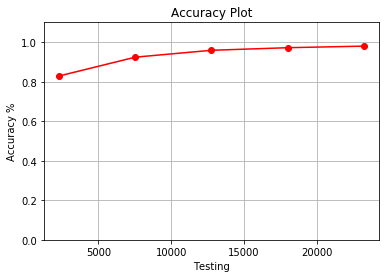

In [33]:
#Decision Tree
plot_accuracy(dt)

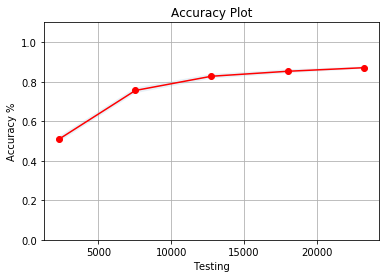

In [34]:
#Gradient Boosting
plot_accuracy(gb)

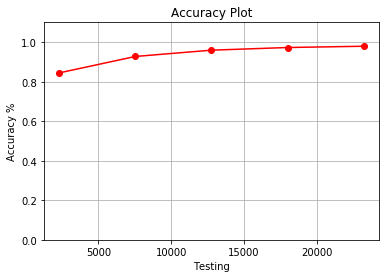

In [35]:
#Random Forest
plot_accuracy(rf)

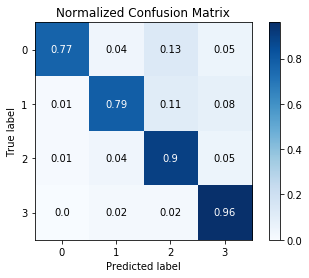

In [36]:
#Decision Tree
import scikitplot as skplt
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(dt, xTest, yTest)
skplt.metrics.plot_confusion_matrix(yTest, y_pred, normalize=True)

plt.show()

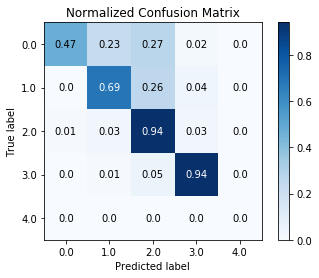

In [37]:
#Gradient Boosting
import numpy as np
import scikitplot as skplt
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(gb, xTest, yTest)
y_pred = np.absolute(y_pred)

skplt.metrics.plot_confusion_matrix(yTest, y_pred.round(), normalize=True)

plt.show()

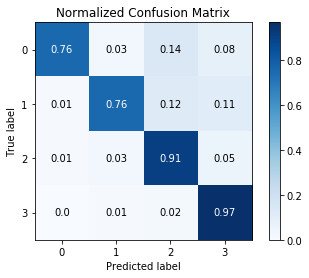

In [38]:
#Random Forest
import scikitplot as skplt
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(rf, xTest, yTest)
skplt.metrics.plot_confusion_matrix(yTest, y_pred, normalize=True)

plt.show()

# Visualisation

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.316058 to fit



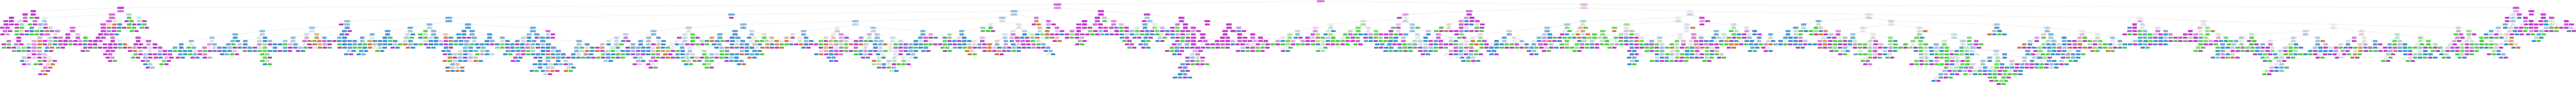

In [190]:
# decision tree visualisation
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [191]:
graph.write_png("images/decision-tree.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.316058 to fit



True

**Pruning Decision Tree**

In [45]:
from sklearn.tree._tree import TREE_LEAF

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

print(sum(dt.tree_.children_left < 0))
# start pruning from the root
prune_index(dt.tree_, 0, 5)
sum(dt.tree_.children_left < 0)

1460


1619

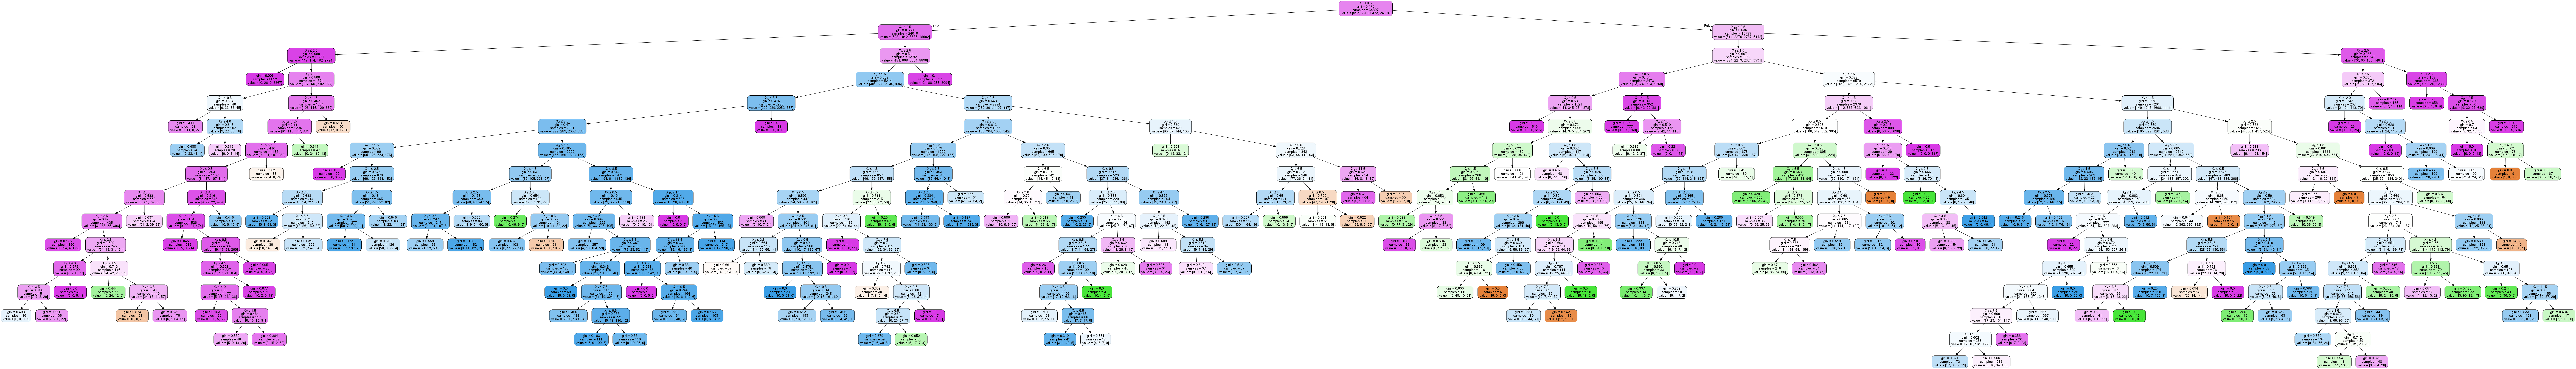

In [40]:
# decision tree visualisation
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [46]:
def rules(clf, features, labels, node_index=0):
    """Structure of rules in a fit decision tree classifier

    Parameters
    ----------
    clf : DecisionTreeClassifier
        A tree that has already been fit.

    features, labels : lists of str
        The names of the features and labels, respectively.

    """
    node = {}
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        count_labels = zip(clf.tree_.value[node_index, 0], labels)
        node['name'] = ', '.join(('{} of {}'.format(int(count), label)
                                  for count, label in count_labels))
    else:
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        node['name'] = '{} > {}'.format(feature, threshold)
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        node['children'] = [rules(clf, features, labels, right_index),
                            rules(clf, features, labels, left_index)]
    return node

In [48]:
rules(dt, features, target)

{'name': 'num_of_prev_attempts > 0.5',
 'children': [{'name': 'code_module_y > 2.5',
   'children': [{'name': 'code_presentation_x > 2.5',
     'children': [{'name': 'code_module_x > 2.5',
       'children': [{'name': 'disability > 2.5',
         'children': [{'name': '0 of f, 0 of i, 7 of n, 611 of a'},
          {'name': 'gender > 0.5',
           'children': [{'name': 'region > 4.0',
             'children': [{'name': '0 of f, 36 of i, 19 of n, 16 of a'},
              {'name': '11 of f, 0 of i, 0 of n, 0 of a'}]},
            {'name': '0 of f, 0 of i, 0 of n, 18 of a'}]}]},
        {'name': '0 of f, 0 of i, 11 of n, 663 of a'}]},
      {'name': 'disability > 2.5',
       'children': [{'name': '0 of f, 8 of i, 15 of n, 118 of a'},
        {'name': 'region > 3.5',
         'children': [{'name': 'region > 11.5',
           'children': [{'name': '0 of f, 0 of i, 0 of n, 10 of a'},
            {'name': 'region > 4.5',
             'children': [{'name': 'code_presentation_x > 1.5',
     

In [50]:
import json

r = rules(dt, features, target)
with open('rules.json', 'w') as f:
    f.write(json.dumps(r))